In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
file_path = "Quality_Education_Dataset.csv"
data = pd.read_csv(file_path)

print(data.head()) # Display the first few rows to verify the data
print(data.info())  # Check data types and missing values
print(data.describe())  # Summary statistics
print("\nMissing Values:")
print(data.isnull().sum()) # Check for missing values


  Student ID  Age      Gender Grade Level Parental Education Level  \
0     S00001    6  Non-binary     Grade 6                      PhD   
1     S00002    6        Male     Grade 3                      PhD   
2     S00003   15  Non-binary     Grade 7                 Master's   
3     S00004   10        Male    Grade 12               Bachelor's   
4     S00005   13        Male    Grade 12                      PhD   

  Household Income School Type School Location  Average Exam Score  \
0        100k-150k      Public           Urban                56.5   
1             <30k     Private           Urban                53.4   
2             <30k      Public           Urban                93.1   
3        100k-150k      Public           Rural                66.7   
4            >150k      Public           Urban                62.0   

   Attendance Rate Internet Access at Home  \
0             96.8                     Yes   
1             86.8                     Yes   
2             99.6  

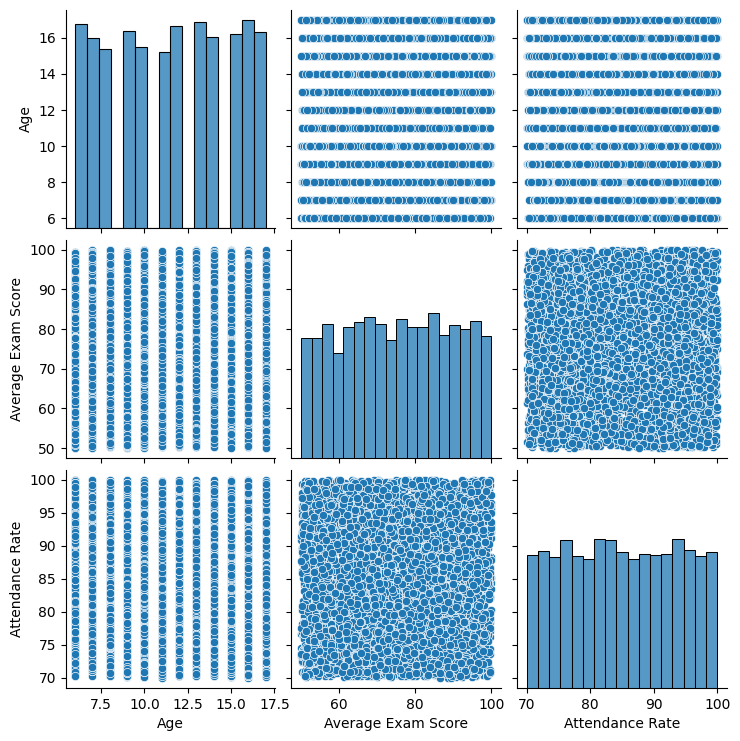

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
# Drop 'Student ID' column
data = data.drop(columns=['Student ID'])

data.head()

,Age,Gender,Grade Level,Parental Education Level,Household Income,School Type,School Location,Average Exam Score,Attendance Rate,Internet Access at Home,Participation in Extracurricular Activities,Special Education Needs
0,6,Non-binary,Grade 6,PhD,100k-150k,Public,Urban,56.5,96.8,Yes,No,Yes
1,6,Male,Grade 3,PhD,<30k,Private,Urban,53.4,86.8,Yes,No,No
2,15,Non-binary,Grade 7,Master's,<30k,Public,Urban,93.1,99.6,Yes,No,Yes
3,10,Male,Grade 12,Bachelor's,100k-150k,Public,Rural,66.7,89.4,No,Yes,No
4,13,Male,Grade 12,PhD,>150k,Public,Urban,62.0,73.2,Yes,Yes,No


In [9]:
#Label Encoding or map to binary
data['Internet Access at Home'] = data['Internet Access at Home'].map({'Yes': 1, 'No': 0})
data['Special Education Needs'] = data['Special Education Needs'].map({'Yes': 1, 'No': 0})
data['Participation in Extracurricular Activities'] = data['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})

#Ordinal Encoding
grade_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5, 'Grade 6': 6, 'Grade 7': 7, 'Grade 8': 8, 'Grade 9': 9, 'Grade 10': 10, 'Grade 11': 11, 'Grade 12': 12}
data['Grade Level'] = data['Grade Level'].map(grade_mapping)

# Label Encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Household Income'] = le.fit_transform(data['Household Income'])
data['Parental Education Level'] = le.fit_transform(data['Parental Education Level'])
data['School Type'] = le.fit_transform(data['School Type'])
data['School Location'] = le.fit_transform(data['School Location'])

# Feature Scaling (Standardization)
scaler = StandardScaler()
data[['Average Exam Score', 'Attendance Rate']] = scaler.fit_transform(data[['Average Exam Score', 'Attendance Rate']])

data.head(10)


,Age,Gender,Grade Level,Parental Education Level,Household Income,School Type,School Location,Average Exam Score,Attendance Rate,Internet Access at Home,Participation in Extracurricular Activities,Special Education Needs
0,6,2,6,3,0,1,1,-1.316547,1.368366,1,0,1
1,6,1,3,3,3,0,1,-1.533801,0.209496,1,0,0
2,15,2,7,2,3,1,1,1.248458,1.692849,1,0,1
3,10,1,12,0,0,1,0,-0.601710,0.510802,0,1,0
4,13,1,12,3,4,1,1,-0.931095,-1.366567,1,1,0
5,10,0,3,3,3,0,0,-0.356422,0.394915,0,1,0
6,13,0,1,1,4,1,1,-0.160192,0.754165,0,0,0
7,6,2,8,3,3,1,1,-1.428678,0.858463,0,0,0
8,13,2,2,1,3,1,0,-0.769907,0.174730,0,1,0
9,16,2,9,3,4,1,1,0.926080,-0.949374,0,0,0


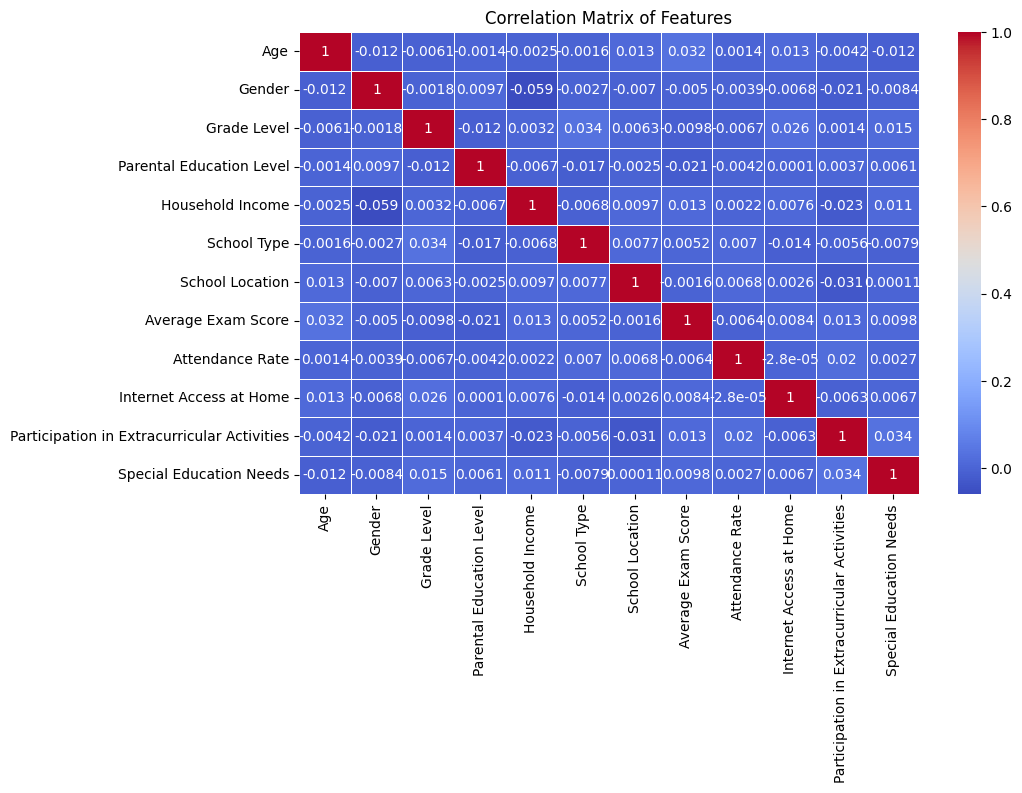

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Special Education Needs'])
y = data['Special Education Needs']

# Double the dataset by concatenating the dataset with itself
X_doubled = pd.concat([X, X], ignore_index=True)
y_doubled = pd.concat([y, y], ignore_index=True)

# Verify the dataset size after doubling
print(f"Original dataset size: {X.shape[0]} samples")
print(f"Doubled dataset size: {X_doubled.shape[0]} samples")

# Split the doubled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_doubled, y_doubled, test_size=0.2, random_state=42, stratify=y_doubled
)

# Check the size of splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Original dataset size: 4846 samples
Doubled dataset size: 9692 samples
Training set size: 7753
Testing set size: 1939


Best parameters: {'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Best MSE score: -0.8318102368919116
Tuned KNN Mean Squared Error: 0.10624033006704486
Tuned KNN Mean Absolute Error: 0.10624033006704486
Accuacy:  0.8937596699329551


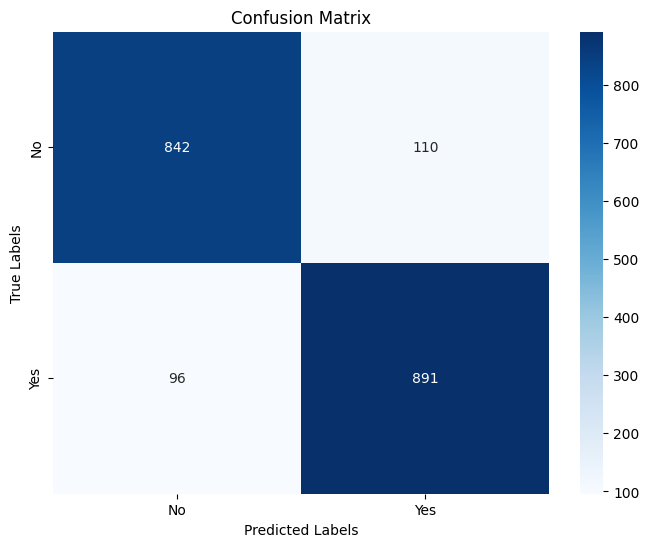

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

# Define a range of values for 'k' and try different distance metrics
param_grid = {
    'n_neighbors': range(1, 21),
    'p': [1, 2],  # 1 for Manhattan, 2 for Euclidean
    'weights': ['uniform', 'distance']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Train and evaluate the model with the best parameters
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Tuned KNN Mean Squared Error:", mean_squared_error(y_test, y_pred_best_knn))
print("Tuned KNN Mean Absolute Error:", mean_absolute_error(y_test, y_pred_best_knn))
print("Accuacy: ", accuracy_score(y_test, y_pred_best_knn))
plot_confusion_matrix(y_test, y_pred_best_knn, ['No', 'Yes'])

Decision Tree Mean Absolute Error: 0.09902011346054668
Accuacy:  0.9009798865394534


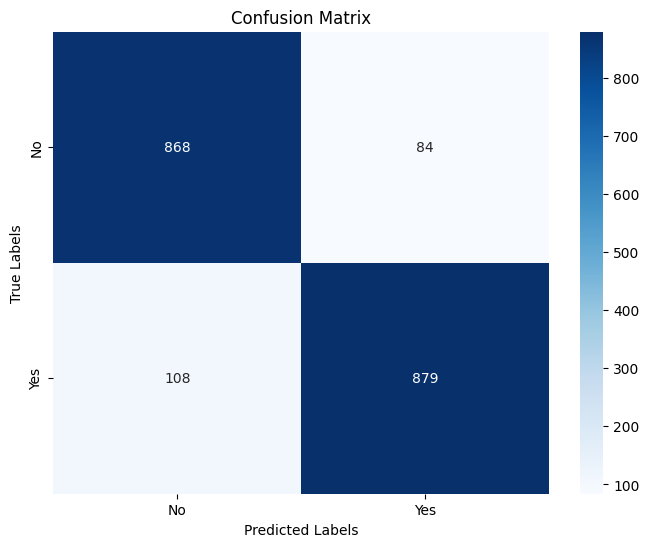

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, y_pred_dt)

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# print("Decision Tree Mean Squared Error:", dt_mse)
print("Decision Tree Mean Absolute Error:", dt_mae)
print("Accuacy: ", accuracy_score(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt, ['No', 'Yes'])

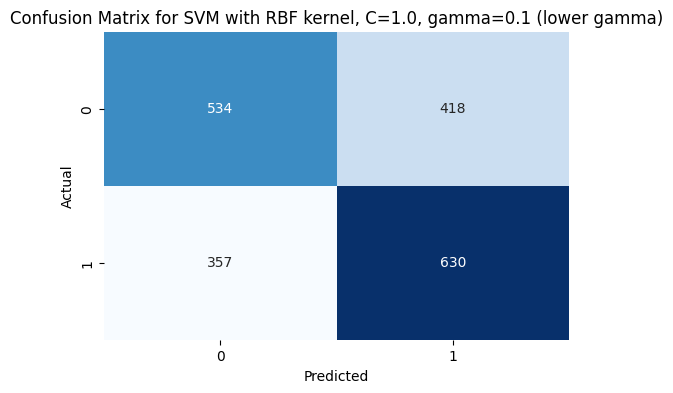

SVM with RBF kernel, C=1.0, gamma=0.1 (lower gamma) Results:
Accuracy: 0.6003094378545643
F1 Score: 0.6191646191646192
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58       952
           1       0.60      0.64      0.62       987

    accuracy                           0.60      1939
   macro avg       0.60      0.60      0.60      1939
weighted avg       0.60      0.60      0.60      1939



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# 1. SVM with RBF kernel, C=1.0, gamma=0.1 (Lower gamma)
svm_rbf_low_gamma = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42)
svm_rbf_low_gamma.fit(X_train, y_train)
y_pred_rbf_low_gamma = svm_rbf_low_gamma.predict(X_test)

# Display results for SVM with RBF kernel, C=1.0, gamma=0.1
cm_rbf_low_gamma = confusion_matrix(y_test, y_pred_rbf_low_gamma)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rbf_low_gamma, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with RBF kernel, C=1.0, gamma=0.1 (lower gamma)')
plt.show()

print("SVM with RBF kernel, C=1.0, gamma=0.1 (lower gamma) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_low_gamma))
print("F1 Score:", f1_score(y_test, y_pred_rbf_low_gamma))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf_low_gamma))
print("=" * 50)

Random Forest Report:
               precision    recall  f1-score   support

          No       0.89      0.89      0.89       952
         Yes       0.90      0.90      0.90       987

    accuracy                           0.89      1939
   macro avg       0.89      0.89      0.89      1939
weighted avg       0.89      0.89      0.89      1939

Gradient Boosting Report:
               precision    recall  f1-score   support

          No       0.56      0.53      0.55       952
         Yes       0.57      0.59      0.58       987

    accuracy                           0.56      1939
   macro avg       0.56      0.56      0.56      1939
weighted avg       0.56      0.56      0.56      1939



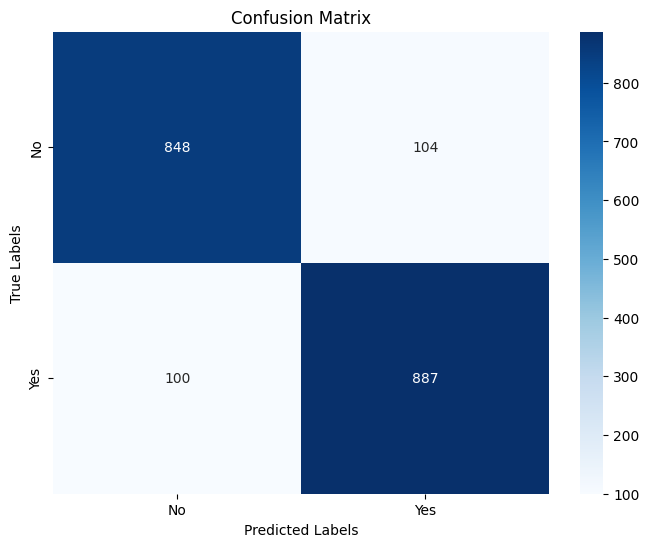

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# education_need_bins = [0, 1]
education_need_labels = ['No', 'Yes']

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, rf_predictions, target_names=education_need_labels))

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Report:\n", classification_report(y_test, gb_predictions, target_names=education_need_labels))

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, rf_predictions,education_need_labels)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       952
           1       0.80      0.79      0.79       987

    accuracy                           0.79      1939
   macro avg       0.79      0.79      0.79      1939
weighted avg       0.79      0.79      0.79      1939



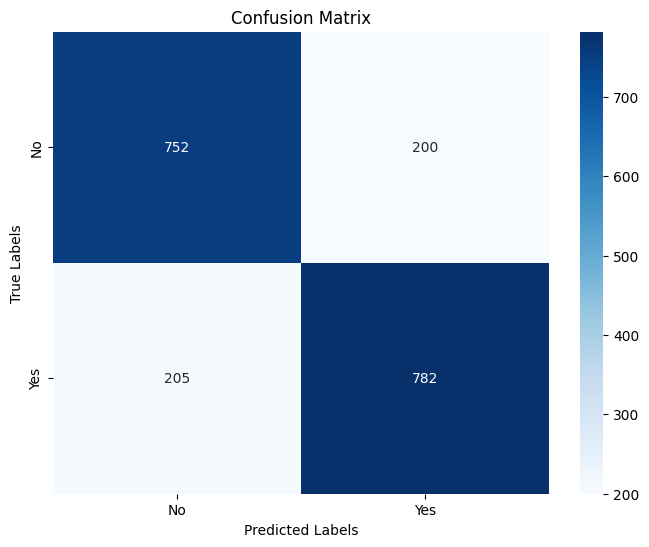

In [17]:
# XGBoost (Extreme Gradient Boosting)
from xgboost import XGBClassifier
xg_model = XGBClassifier(eval_metric='logloss', random_state=42)
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)
print(classification_report(y_test, y_pred_xg))

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_xg, education_need_labels)
